<font size="+3" color=Red><b> <center><u> Image Segmentation and Classification </u></center></b></font>

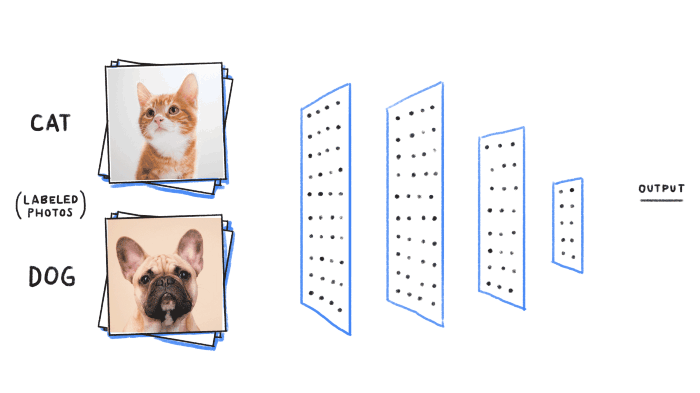

Image segmentation is the classification of an image into different groups. Many researches have been done in the area of image segmentation using clustering. There are different methods and one of the most popular methods is k-means clustering algorithm. K -means clustering algorithm is an unsupervised algorithm and it is used to segment the interest area from the background. But before applying K -means algorithm, first partial stretching enhancement is applied to the image to improve the quality of the image. Subtractive clustering method is data clustering method where it generates the centroid based on the potential value of the data points. So subtractive cluster is used to generate the initial centers and these centers are used in k-means algorithm for the segmentation of image. Then finally medial filter is applied to the segmented image to remove any unwanted region from the image...

Image segmentation 

Image segmentation is the process of partitioning an image into multiple different regions (or segments). The goal is to change the representation of the image into an easier and more meaningful image.

It is an important step in image processing, as real world images doesn't always contain only one object that we wanna classify. For instance, for self driving cars, the image would contain the road, cars, pedestrians, etc. So we may need to use segmentation here to separate objects and analyze each object individually (i.e image classification) to check what it is.

K-Means clustering is unsupervised machine learning algorithm that aims to partition N observations into K clusters in which each observation belongs to the cluster with the nearest mean. A cluster refers to a collection of data points aggregated together because of certain similarities. For image segmentation, clusters here are different image colors.


Image segmentation is an essential topic in an image processing framework. It is the process to classify an image into different groups. There are many different methods, and k-means is one of the most popular methods.

In [ ]:

from glob import glob
import numpy as np
import matplotlib.pyplot as plt

from skimage.io import imread
from skimage.color import rgb2grey
from sklearn.feature_extraction import image
from sklearn.cluster import KMeans
from skimage.filters import rank, threshold_otsu
from skimage.morphology import closing, square, disk
from skimage import exposure as hist, data, img_as_float
from skimage.segmentation import chan_vese
from skimage.feature import canny
from skimage.color import rgb2gray
from scipy import ndimage as ndi 

The glob module finds all the pathnames matching a specified pattern according to the rules used by the Unix shell, although results are returned in arbitrary order. No tilde expansion is done, but *, ?, and character ranges expressed with [] will be correctly matched. This is done by using the os.scandir() and fnmatch.fnmatch() functions in concert, and not by actually invoking a subshell. Note that unlike fnmatch.fnmatch(), glob treats filenames beginning with a dot (.) as special cases. (For tilde and shell variable expansion, use os.path.expanduser() and os.path.expandvars().)

For a literal match, wrap the meta-characters in brackets. For example, '[?]' matches the character '?'.

link : https://docs.python.org/3/library/glob.html

In [ ]:
mal_images = glob('../input/skin-cancer-malignant-vs-benign/data/train/malignant/*')
ben_images = glob('../input/skin-cancer-malignant-vs-benign/data/train/benign/*')

In [ ]:
mal_images_1 = glob('../input/skin-cancer-malignant-vs-benign/data/train/malignant/*')[:5]
ben_images_1 = glob('../input/skin-cancer-malignant-vs-benign/data/train/benign/*')[:5]

In [ ]:
len(mal_images)


In [ ]:
len(ben_images)

In [ ]:
#https://www.sciencedirect.com/topics/engineering/binary-image
def binary(image):
    return image > threshold_otsu(image)

#https://campus.datacamp.com/courses/introduction-to-data-visualization-in-python/analyzing-time-series-and-images?ex=13
def equalize(image):
    return hist.equalize_hist(image)

#https://homepages.inf.ed.ac.uk/rbf/HIPR2/median.htm
def mean_filter(image, raio_disk):
    return rank.mean_percentile(image, selem = disk(raio_disk))

def preenche_bords(image):
    return ndi.binary_fill_holes(image)

#https://www.unioviedo.es/compnum/labs/PYTHON/intro_image.html

def load_images(paths):
    tmp = []
    for path in paths:
        tmp.append(imread(path))
    return tmp
    
def plot_any(arr, title = ''):
    plt.figure(figsize = (15, 25))
    for i in range(len(arr)):
        plt.subplot(1,len(arr),i + 1)
        plt.title(title)
        plt.imshow(arr[i]);

        
def plot_camadas(img):
    plt.figure(figsize = (15, 25))
    for i in range(3):
        plt.subplot(1, 3, i + 1)
        plt.imshow(img[:,:,i], cmap = 'gray');
        
def d2Kmeans(img, k):
    return KMeans(n_jobs=-1, 
                  random_state=1, 
                  n_clusters = k, 
                  init='k-means++'
    ).fit(img.reshape((-1,1))).labels_.reshape(img.shape)

def merge_segmented_mask_ROI(uri_img, img_kluster):
    new_img = uri_img.copy()
    for ch in range(3):
        new_img[:,:, ch] *= img_kluster
    return new_img


def elbow(img, k):
    hist = []
    for kclusters in  range(1, k):
        Km = KMeans(n_jobs=-1, random_state=1, n_clusters = kclusters, init='k-means++').fit(img.reshape((-1,1)))  
        hist.append(Km.inertia_)
        
    plt.figure(figsize = (15, 8))
    plt.grid()
    plt.plot(range(1, k), hist, 'o-')
    plt.ylabel('Soma das distâncias quadradas')
    plt.xlabel('k clusters')
    plt.title('Elbow')
    plt.show();
    
    

In [ ]:
mal = load_images(mal_images)
ben = load_images(ben_images)

mal_1 = load_images(mal_images_1)
ben_1 = load_images(ben_images_1)

In [ ]:
plot_any(mal_1)
plot_any(ben_1)


In [ ]:
img_selected = mal[1]

In [ ]:
elbow(img_selected, 6)

In [ ]:
k_klusters = 2

In [ ]:
result_gray = d2Kmeans(rgb2grey(img_selected), k_klusters)
result_img = d2Kmeans(img_selected, k_klusters)

In [ ]:
klusters_gray = [result_gray == i for i in range(k_klusters)]
plot_any(klusters_gray)

In [ ]:
def select_cluster_index(clusters):
    minx = clusters[0].mean()
    index = 0
    for i in clusters:
        if i.mean() < minx:
            minx = i.mean()
            index += 1
    return index

In [ ]:
index_kluster = select_cluster_index(klusters_gray)
print(index_kluster)
selecionado = klusters_gray[index_kluster]

In [ ]:
 for ch in range(3):
    img_k = []
    for K in range(k_klusters):
         img_k.append(result_img[:, :, ch] == K)
    plot_any(img_k)

In [ ]:
clusters = [(result_img[:,:,1] == K) for K in range(k_klusters)]

In [ ]:
clusters

In [ ]:
new_img = merge_segmented_mask_ROI(img_selected, selecionado)

In [ ]:
plot_any([new_img])

In [ ]:
image_mean_filter = mean_filter(selecionado, 20)
test_binary = binary(image_mean_filter)

In [ ]:
plot_any([selecionado, image_mean_filter, test_binary])

In [ ]:
final_result = merge_segmented_mask_ROI(img_selected ,test_binary)

In [ ]:
final_result.shape

In [ ]:
plot_any([test_binary, new_img, final_result])

In [ ]:
 max_mean = 0
img_gray = rgb2gray(final_result)
 img_bin  = binary(img_gray)
x, y = img_bin.shape

 limits_before = []
for i in range(x):
    for j in range(y):
        if  img_bin[i, j]:
            limits_before.append(j)
            
stop_before = ( sum(limits_before) // len(limits_before) ) // 2
img_copy = img_bin.copy()
for i in range(x):
    for j in range(stop_before):
        img_copy[i, j] = 0
        limits_after = []
for i in range(x):
     for j in range(y - 1, 0, -1):
        if  img_copy[i, j]:
            limits_after.append(j)
            
stop_after = sum(limits_after) // len(limits_after) + min(limits_after)
for i in range(x):
    for j in range(stop_after, y):
        img_copy[i, j] = 0

mean_result = mean_filter(img_copy, 15)
mean_result = binary(mean_result)
final_result = merge_segmented_mask_ROI(img_selected , mean_result)


 plot_any([mean_result, final_result])

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import cv2
img = cv2.imread(mal_images[1]) 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
r, g, b = cv2.split(img)
r = r.flatten()
g = g.flatten()
b = b.flatten()
#plotting 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(r, g, b)
plt.show()

Starting the classification with segemented images

In [ ]:
data_mal = list() 
for img in mal :
    img = merge_segmented_mask_ROI(img ,test_binary)
    data_mal.append(img)

In [ ]:
data_ben = list() 
for img in ben :
    img = merge_segmented_mask_ROI(img ,test_binary)
    data_ben.append(img)

In [ ]:
len(data_ben)
len(data_mal)

In [ ]:
import cv2
import os
import io
import skimage
# create a directory in which to store cropped images
out_dir = "/kaggle/working/skin_seg"
if not os.path.exists(out_dir):
    os.makedirs(out_dir)

# save each cropped image by its index number
for k,im in enumerate(data_ben):
    skimage.io.imsave( 'ben' + str(k) + ".jpg", im)       

In [ ]:
# create a directory in which to store cropped images
out_dir = "‪/kaggle/working/skin_seg"
if not os.path.exists(out_dir):
    os.makedirs(out_dir)

# save each cropped image by its index number
for c,image in enumerate(data_mal):
    skimage.io.imsave( 'mal' + str(c) + ".jpg", image)

In [ ]:
plt.imshow(data_ben[1],cmap = 'hot')

In [ ]:

from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

from sklearn import svm, metrics, datasets
from sklearn.utils import Bunch
from sklearn.model_selection import GridSearchCV, train_test_split

from skimage.io import imread
from skimage.transform import resize

In [ ]:
def load_image_files(container_path, dimension=(28, 28)):
    """
    Load image files with categories as subfolder names 
    which performs like scikit-learn sample dataset
    
    Parameters
    ----------
    container_path : string or unicode
        Path to the main folder holding one subfolder per category
    dimension : tuple
        size to which image are adjusted to
        
    Returns
    -------
    Bunch
    """
    image_dir = Path(container_path)
    folders = [directory for directory in image_dir.iterdir() if directory.is_dir()]
    categories = [fo.name for fo in folders]

    descr = "A image classification dataset"
    images = []
    flat_data = []
    target = []
    for i, direc in enumerate(folders):
        for file in direc.iterdir():
            img = skimage.io.imread(file)
            img_resized = resize(img, dimension, anti_aliasing=True, mode='reflect')
            flat_data.append(img_resized.flatten()) 
            images.append(img_resized)
            target.append(i)
    flat_data = np.array(flat_data)
    target = np.array(target)
    images = np.array(images)
    images.reshape((-1, 1, 28, 28))

    return Bunch(data=flat_data,
                 target=target,
                 target_names=categories,
                 images=images,
                 DESCR=descr)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tqdm import tqdm
import numpy
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.constraints import maxnorm
from keras.utils import np_utils
import sklearn

In [ ]:
image_dataset = load_image_files("../input/segmented-images-of-the-skin-cancer-dataset/")

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(
    image_dataset.data, image_dataset.target, test_size=0.3,random_state=109)

In [ ]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
print(clf)

In [ ]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [ ]:
from sklearn.model_selection import train_test_split

clf.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score
preds = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test,preds))

In [ ]:
print(X_train.shape)
print(X_test.shape )
print(y_train.shape )
print(y_test.shape) 

In [ ]:
x_train, x_test, y_train_v, y_test_v = train_test_split(X_train,y_train, test_size = 0.3, random_state = 2)

In [ ]:
rf = RandomForestClassifier()

rf.fit(x_train,y_train_v)
# Predictions on training and validation
y_pred_train = rf.predict(x_train)
    # predictions for test
y_pred_test = rf.predict(x_test)
    # training metrics
print("Training metrics:")
print(sklearn.metrics.classification_report(y_true= y_train_v, y_pred= y_pred_train))
    
    # test data metrics
print("Test data metrics:")
print(sklearn.metrics.classification_report(y_true= y_test_v, y_pred= y_pred_test))

In [ ]:
print(rf.classes_)


In [ ]:
from PIL import Image
import time
from torch.autograd import Variable
import json
import copy
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import PIL
from PIL import Image
from collections import OrderedDict
import torch
from torch import nn, optim
from torch.optim import lr_scheduler
from torch.autograd import Variable
import torchvision
from torchvision import datasets, models, transforms
from torch.utils.data.sampler import SubsetRandomSampler
import torch.nn as nn
import torch.nn.functional as F

from skimage.transform import resize

In [ ]:
img_path="../input/segmented-images-of-the-skin-cancer-dataset/benign_segmented/ben1.jpg"
img_ = cv2.imread(img_path, cv2.IMREAD_COLOR)
img_ = cv2.resize(img_, (28, 28))
img_ = cv2.cvtColor(img_, cv2.COLOR_RGB2BGR)
plt.imshow(img_)



2 method 

In [ ]:
!pip install mahotas
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

import numpy as np
import mahotas
import cv2
import os
import h5py
import glob
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# make a fix file size
fixed_size  = tuple((1000,1000))

#train path 
train_path = "../input/segmented-images-of-the-skin-cancer-dataset/"

# no of trees for Random Forests
num_tree = 100

# bins for histograms 
bins = 8

# train_test_split size
test_size = 0.10

# seed for reproducing same result 
seed = 9

In [ ]:
def fd_hu_moments(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    feature = cv2.HuMoments(cv2.moments(image)).flatten()
    return feature

In [ ]:

# feature-descriptor -2 Haralick Texture 

def fd_haralick(image):
    # conver the image to grayscale
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    # Ccompute the haralick texture fetature ve tor 
    haralic = mahotas.features.haralick(gray).mean(axis=0)
    return haralic

In [ ]:
# feature-description -3 Color Histogram

def fd_histogram(image, mask=None):
    # conver the image to HSV colors-space
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    #COPUTE THE COLOR HISTPGRAM
    hist  = cv2.calcHist([image],[0,1,2],None,[bins,bins,bins], [0, 256, 0, 256, 0, 256])
    # normalize the histogram
    cv2.normalize(hist,hist)
    # return the histog....
    return hist.flatten()

In [ ]:
# get the training data labels 
train_labels = os.listdir(train_path)

# sort the training labesl 
train_labels.sort()
print(train_labels)

# empty list to hold feature vectors and labels 
global_features = []
labels = []

i, j = 0, 0 
k = 0

# num of images per class 
images_per_class = 80

In [ ]:
# ittirate the folder to get the image label name

%time
# lop over the training data sub folder 

for training_name in train_labels:
    # join the training data path and each species training folder
    dir = os.path.join(train_path, training_name)

    # get the current training label
    current_label = training_name

    k = 1
    # loop over the images in each sub-folder
        
    for file in os.listdir(dir):

        file = dir + "/" + os.fsdecode(file)
       
        # read the image and resize it to a fixed-size
        image = cv2.imread(file) 
        
        if image is not None:
            image = cv2.resize(image,fixed_size)
            fv_hu_moments = fd_hu_moments(image)
            fv_haralick   = fd_haralick(image)
            fv_histogram  = fd_histogram(image)
        #else:
            #print("image not loaded")
                
        #image = cv2.imread(file)        
        #image = cv2.resize(image,fixed_size)

        # Concatenate global features
        global_feature = np.hstack([fv_histogram, fv_haralick, fv_hu_moments])

        # update the list of labels and feature vectors
        labels.append(current_label)
        global_features.append(global_feature)

        i += 1
        k += 1
    print("[STATUS] processed folder: {}".format(current_label))
    j += 1

print("[STATUS] completed Global Feature Extraction...")


In [ ]:
%time
# get the overall feature vector size
print("[STATUS] feature vector size {}".format(np.array(global_features).shape))

# get the overall training label size
print("[STATUS] training Labels {}".format(np.array(labels).shape))

# encode the target labels
targetNames = np.unique(labels)
le = LabelEncoder()
target = le.fit_transform(labels)
print("[STATUS] training labels encoded...{}")
# normalize the feature vector in the range (0-1)
scaler = MinMaxScaler(feature_range=(0, 1))
rescaled_features = scaler.fit_transform(global_features)
print("[STATUS] feature vector normalized...")

print("[STATUS] target labels: {}".format(target))
print("[STATUS] target labels shape: {}".format(target.shape))


In [ ]:

global_features = np.array(rescaled_features)
global_labels = np.array(target)

In [ ]:
# split the training and testing data
(trainDataGlobal, testDataGlobal, trainLabelsGlobal, testLabelsGlobal) = train_test_split(np.array(global_features),
                                                                                          np.array(global_labels),
                                                                                          test_size=test_size,
                                                                                          random_state=seed)

In [ ]:
import sklearn
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# create the model - Random Forests
clf  = RandomForestClassifier(n_estimators=100)

# fit the training data to the model
clf.fit(trainDataGlobal, trainLabelsGlobal)

#print(clf.fit(trainDataGlobal, trainLabelsGlobal))

clf_pred = clf.predict(trainDataGlobal)
#clf_pred = clf.predict(global_feature.reshape(1,-1))[0]
print(classification_report(trainLabelsGlobal,clf_pred))
y_pred_test = clf.predict(testDataGlobal)

print(classification_report(testLabelsGlobal,y_pred_test))
#print(confusion_matrix(trainLabelsGlobal,clf_pred))

#print(clf.predict(trainDataGlobal))

#print(clf.predict(global_feature.reshape(1,-1))[0])

In [ ]:
# path to test data
test_path = "../input/segmented-images-of-the-skin-cancer-dataset/benign_segmented/ben1.jpg"


    #print(file)
    
    # read the image
image = cv2.imread(test_path)

    # resize the image
image = cv2.resize(image, fixed_size)

    # Global Feature extraction
fv_hu_moments = fd_hu_moments(image)
fv_haralick   = fd_haralick(image)
fv_histogram  = fd_histogram(image)

    # Concatenate global features

global_feature = np.hstack([fv_histogram, fv_haralick, fv_hu_moments])

    # predict label of test image
prediction = clf.predict(global_feature.reshape(1,-1))[0]

    # show predicted label on image
cv2.putText(image, train_labels[prediction], (20,30), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0,255,255), 3)

    # display the output image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()


In [ ]:
data.to_csv(r'df_name.csv')

In [ ]:
from IPython.display import FileLink
FileLink(r'df_name.csv')